Junyi notebook in RDQH

The Pricing of Barrier Option-------- Based on BSM

In [9]:
#########################################################
###########package loaded################################
#########################################################


import math
from scipy.stats.distributions import norm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#---------------------------------------------------------

In [ ]:
##########################################################
#### parameters input----method one#######################
##########################################################




error= True
message = 'This input is incorrect. Plz enter p for put or c for call'
while error:
    error = False
    putcall = input('Do you want to price a put or a call-----')
    if putcall == 'p':
        phi = -1
    elif putcall == 'c':
        phi = 1
    else:
        print(message)

        
###########input############################            
S = input('Please enter the current price of underlying asset- ')
X = input('Please enter the strike price of the option - ')
T = input('Please enter the time to maturity(in days)- ' )
sigma = input('Please enter the volatility of underlyging asset- ')
b = input('Please enter the carry rate- ')
r = input('Please enter the yearly interest rate- ')
r = r
H = input('Please enter the barrier height- ')
K = input('How high is the rebate you receive if you get knocked out?- ')


message3 = 'Please enter in or out'
error3 = True
while error3:
    inout = input('Please type whether it is an out aor an in-')
    if inout == 'out' or inout == 'in':
        error3 = False
    else:
        print(message3)

##########################################
####参数数据结构转化######################
##########################################
sigma = float(sigma)
T = float(T)/365
r = float(r)
X = float(X)
b = float(b)
H = float(H)
K = float(K)
S = float(S)
print('-------------------------------------')

In [2]:
##########################################################
#### parameters input----method two#######################
##########################################################






        
###########input            
S = 3320
X = 3400
T = 120   ##########in days
sigma = 0.1
b = 0   ######carry rate
r = 0.065   ########risk free rate
r = r
H = 4000        ########barrier height
K = 0       #######rebate

putcall = 'c'
inout = 'out'


if putcall == 'p':
    phi = -1
elif putcall == 'c':
    phi = 1

##########################################
####参数数据结构转化######################
##########################################
sigma = float(sigma)
T = float(T)/365
r = float(r)
X = float(X)
b = float(b)
H = float(H)
K = float(K)
S = float(S)

In [57]:
############Function Define for pricing############
#######-----------Method one----------------#########

def price_option(S):
    if putcall == 'c':
        phi = 1
    else:
        phi = -1
    if S>H:
        eta = 1
    else:
        eta = -1
    
    
    
    sigma2 = sigma**2
    mu  = (b-(sigma2/2))/sigma2
    landa = math.sqrt(mu**2+(2*r)/sigma2)
    x1 = (math.log(S/X)) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    x2 = (math.log(S/H)) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    y1 = math.log((H**2)/(S*X)) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    y2 = math.log(H/S) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    z = math.log(H/S) / (sigma*math.sqrt(T)) + landa*sigma*math.sqrt(T)
    
    
    n1 = phi*x1 - phi*sigma*math.sqrt(T)
    A = phi * S*math.exp(b-r)*norm.cdf(phi*x1,0,1) - phi*X*math.exp(-r*T)*norm.cdf(n1,0,1)
    
    n2=phi*x2-phi*sigma*math.sqrt(T)
    B = phi *S*math.exp(b-r)*norm.cdf(phi*x2,0,1) - phi*X*math.exp(-r*T)*norm.cdf(n2,0,1)
    
    n3 = eta*y1
    n4 = eta*y1 - eta*sigma*math.sqrt(T)
    
    C = phi * S*math.exp(b-r)*(H/S)**(2*(mu+1))*norm.cdf(n3,0,1) - phi*X*math.exp(-r*T)*(H/S)
    
    n5 = eta*y2
    n6 = eta*y2 - eta*sigma*math.sqrt(T)
    D = phi * S*math.exp(b-r)*(H/S)**(2*(mu+1))*norm.cdf(n5,0,1) - phi*X*math.exp(-r*T)*(H/S)
    
    
    n9 = norm.cdf(eta*x2 - eta*sigma*math.sqrt(T),0,1)
    n10 = norm.cdf(eta*y2 - eta*sigma*math.sqrt(T),0,1)
    E = K*math.exp(-r*T)*(n9 - (H/S)**(2*mu)*n10)
    
    n11 = norm.cdf(z*eta,0,1)
    n12 = norm.cdf(eta*z - 2*eta*landa*sigma*math.sqrt(T),0,1)
    F = K*math.exp(-r*T)*((H/S)**(mu+landa)*(n11)-(H/S)**(mu-landa)*n12)

    
    
    if putcall == 'p':
        if X < H:
            if S > H:
                if inout =='in':
                    price = A + E
                elif inout == 'out':
                    price = F
            else:
                if inout == 'in':
                    price = C + E
                elif inout == 'out':
                    price = A - C + F
        
        else:
            if S > H:
                if inout == 'in':
                    price = B - C + D + E
                elif inout == 'out':
                    price = A - B + C - D + F
            else:
                if inout == 'in':
                    price = A - B + D + E
                elif inout == 'out':
                    price = B - D + F
    else:
        if X < H:
            if S > H:
                if inout == 'in':
                    price = A - B + D + E
                elif inout == 'out':
                    price = B - D + F
            else:
                if inout == 'in':
                    price = B - C + E + D
                elif inout == 'out':
                    price = A - B + C - D + F
        else:
            if S > H:
                if inout == 'in':
                    price = C + E
                elif inout == 'out':
                    price = A - C + F
            else:
                if inout == 'in':
                    price = A + E
                elif inout == 'out':
                    price = F
    if price < 0:
        price = 0
    
    return price

In [58]:
print(price_option(S))

0


In [3]:
#############Function defined for pricing##########
########-----------Method two-------------#########
#####场外期权发展现状及定价研究######################


def price_option_2(S):
    
    
    d1 = (-np.log(S/H)-(r-b+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 + sigma*np.sqrt(T)
    d3 = (np.log(S/H)-(r-b-sigma**2/2)*T/(sigma*np.sqrt(T)))
    d4 = d3 + sigma*np.sqrt(T)
    d5 = (np.log(X/S)-(r-b+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d6 = d5 + sigma*np.sqrt(T)
    d7 = np.log(S*X/H**2)-(r-b-sigma**2/2)*T/sigma*np.sqrt(T)
    d8 = d7+sigma*np.sqrt(T)

          
          
    if putcall == 'c':
        if inout == 'in':
            if S < H:
                price = S*np.exp(-b*T)*(norm.cdf(-d1,0,1)-(S/H)**(-2/sigma**2*(r-b)-1)*(norm.cdf(d3,0,1)-norm.cdf(d7,0,1)))-X*np.exp(-r*T)(norm.cdf(-d2,0,1)-(S/H)**(-2/sigma**2*(r-q)+1)*(norm.cdf(d4,0,1)-norm.cdf(d8,0,1)))
                  #####向上敲入看涨期权
            else:
                price = S*np.exp(-b*T)*(S/H)**(-2/sigma**2*(r-b)-1)*norm.cdf(-d7,0,1)-K*np.exp(-r*T)*(S/H)**(-2/sigma**2*(r-b)+1)*norm.cdf(-d8,0,1)
                  #####向下敲入看涨期权
        else:
            if S < H:
                price = S*np.exp(-b*T)*(norm.cdf(d1,0,1)-norm.cdf(d5,0,1)-(S/H)**(-2/sigma**2*(r-b)-1)*(norm.cdf(d3,0,1)-norm.cdf(d7,0,1)))-X*np.exp(-r*T)*(norm.cdf(d2,0,1)-norm.cdf(d6,0,1)-(S/H)**(-2/sigma**2*(r-b)+1)*(norm.cdf(d4,0,1)-norm.cdf(d8,0,1)))
                  #####向上敲出看涨期权
            else:
                price = S*np.exp(-b*T)*(norm.cdf(-d5,0,1)-(S/H)**(-2/sigma**2*(r-b)-1)*norm.cdf(-d7,0,1))-K*np.exp(-r*T)*(-(S/H)**(-2/sigma**2*(r-b)+1)*norm.cdf(-d8,0,1)+norm.cdf(-d6,0,1))
                #####向下敲出看涨期权
    else:
        if inout == 'in':
            if S < H :
                price = H*np.exp(-r*T)*(S/H)**(-2/sigma**2*(r-b)-1)*norm.cdf(d8,0,1)-S*np.exp(-b*T)*(S/H)**(-2/sigma**2*(r-b)-1)*norm.cdf(d7,0,1)
                ####向上敲入看跌期权
            else:
                X*np.exp(-r*T)*(norm.cdf(d2,0,1)-(S/H)**(-2/sigma**2*(r-b)+1)*(norm.cdf(d4,0,1)-norm.cdf(d8,0,1)))-S*np.exp(-b*T)(norm.cdf(d1,0,1)-(S/H)**(-2/sigma**2*(r-b)-1)*(norm.cdf(d3,0,1)-norm.cdf(d7,0,1)))
                ######向下敲入看跌期权
        else:
            if S < H :
                X*np.exp(-r*T)*(norm.cdf(d6,0,1)-(S/H)**(-2/sigma**2*(r-b)+1)*norm.cdf(d8,0,1))-S*np.exp(-q*T)*(norm.cdf(d5,0,1)-(S/H)**(-2/sigma**2*(r-b)-1)*norm.cdf(d7,0,1))
                ####向上敲出看跌期权
            else:
                price = X*np.exp(-r*T)*(norm.cdf(d6,0,1)-norm.cdf(d2)-(S/H)**(-2/sigma**2*(r-b)-1)*(norm.cdf(d8,0,1)-norm.cdf(d4,0,1)))-S*np.exp(-r*T)(norm.cdf(d5,0,1)-norm.cdf(d1,0,1)-(S/H)**(-2/sigma**2*(r-q)+1)*(norm.cdf(d7,0,1)-norm.cdf(d3,0,1)))
                ####向下敲出看跌期权
    
    return price


In [4]:
print(price_option_2(S))

387.004349632854


range(3070, 3570)
[991.1544244438114, 986.6807134832006, 982.2298300813763, 977.8016701581341, 973.3961302342404, 969.0131074278211, 964.6524994507945, 960.3142046053958, 955.9981217805566, 951.70415044845, 947.4321906610526, 943.1821430466007, 938.953908806086, 934.7473897099057, 930.5624880943578, 926.3991068582818, 922.2571494595122, 918.1365199117013, 914.0371227807086, 909.9588631814181, 905.9016467742554, 901.8653797619313, 897.8499688860647, 893.8553214239182, 889.8813451850356, 885.9279485079801, 881.995040257103, 878.0825298192153, 874.1903271003766, 870.3183425226473, 866.4664870208744, 862.6346720394963, 858.8228095292975, 855.0308119442316, 851.25859223833, 847.5060638624216, 843.77314076109, 840.0597373694295, 836.3657686100494, 832.6911498898446, 829.0357970969831, 825.3996265977228, 821.7825552334618, 818.1845003175754, 814.6053796323861, 811.04511142614, 807.5036144099802, 803.9808077549146, 800.4766110888172, 796.9909444933942, 793.523728501332, 790.0748840931183, 786.

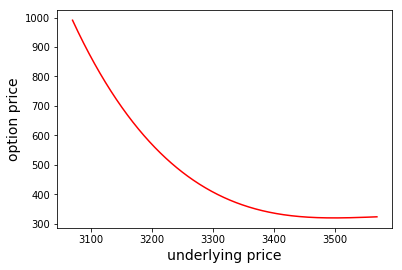

In [7]:
###################sensitivity analysis#############
S = int(S)
u_price = range(S-250,S+250)
##option prices

op_price = []
for i in range(len(u_price)):
    op_price.append(price_option_2(u_price[i]))

print(u_price)
print(op_price)


########Plotting the underlyging price vs the optino price
plt.plot(u_price, op_price, color='red')
plt.xlabel('underlying price', fontsize=14)
plt.ylabel('option price', fontsize=14)
plt.title('')
plt.show()

Another moehod for option pricing

In [ ]:
#########################################
# Exotic Barrier Option (up-and-in) Pricing
# by: big daddy
#########################################
#----------------------------------------
#########################################

In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp, sqrt
from matplotlib import style
from random import gauss

In [ ]:
#-----------------------------------------
#Class for all parameters
#------------------------------------------
class parameters():
    '''parameters to be used for program'''
    #--------------------------------------
    def __init__(self):
        '''initialized parameters'''
        
        self.S = 5             # underlying asset price
        self.v = 0.30          # volatility
        self.r = 0.05          #10 year risk free rate
        self.T = 365.0/365.0   #years until maturity
        self.K = 6             #strike price
        self.B = 8             #barrier price
        self.delta_t = 0.001   #timestep
        self.N = self.T/self.delta_t
                               #Number of discrete time points
        self.simulations = 1000
                               #num of simulation
        
    #----------------------------------------
    def print_parameters(self):
        '''print parameters'''
        
        
        print('---------------------------')
        print('---------------------------')
        print('Pricing an up-and-in option')
        print('---------------------------')
        print('Parameters of Barrier Option Pricer: ')
        print('Uderlying Asset Price = ', self.S)
        print('Volatility = ', self.v)
        print('Risk-Free 10 Year Treasury Rate = ',self.r)
        print('Years Until Expiration = ', self.T)
        print('Time-Step = ', self.delta_t)
        print('discrete time points = ', self.N)
        print('Number of Simulation = ', self.simulations)
        print('---------------------------')
        print('---------------------------')

In [ ]:
prm=parameters()
prm.print_parameters()

In [ ]:
#-----------------------------------------
#Class for Monte Carlo
#-----------------------------------------

class up_and_in_mc(parameters):
    '''Parameters are fed in as subclass'''
    
    #--------------------------------------
    def __int__(self):
        '''initialize the class including the subclass'''
        parameters.__init__(self)
        self.payoffs = []
        self.price_trajectories = []
        self.discount_factor = exp(-self.r * self.T)
        
    #-------------------------------------
    def call_payoff(self,s):
        self.cp = max(s-self.K, 0.0)
        return self.cp
    
    
    #-------------------------------------
    def calculate_payoff_vector(self):
        '''Main interative loop to run the Monte Carlo 
        Simulation. Returns a Vector of different 
        potential payoffs'''
        
        
        for i in range(0, self.simulations):
            self.stock_path = []
            self.price_trajectories = []
            self.S_j = self.S
            for j in range(0, int(self.N-1)):
                self.xi = gauss(0,1.0)
                
                self.S_j *= exp((self.r-0.5*self.v*self.v)*self.delta_t + self.v*sqrt(self.delta_t)*self.xi)
                
                self.stock_path.append(self.S_j)
                self.price_trajectories.append(self.stock_path)
            if max(self.stock_path) > self.B:
                self.payoffs.append(self.call_payoff(self.stock_path[-1]))
            elif max(self.stock_path) < self.B:
                self.payoffs.append(0)
        return self.payoffs



    #-------------------------------------
    def compute_price(self):
        self.np_payoffs = np.array(self.payoffs, dtype=float)
        self.np_Vi = self.discount_factor*self.np_payoffs
        self.price = np.average(self.np_Vi)
        
    #---------------------------------------
    def print_price(self):
        print('call price: ', self.price)
        print('-----------------------------')
              
    #---------------------------------------
    def print_statistics(self):
        self.variace = np.var(self.np_Vi)
        self.sd = np.std(self.np_Vi)
        ####1.96 based on the z-value at 95%
        self.CI = [self.price-(1.96*self.sd/sqrt(float(self.simulations))),self.price+(1.96*selfsd/sqrt(float(self.simulation)))]
              
    
    #------------------------------------------
    def print_statistics(self):
        print('variance :', self.variance)
        print('standard deviation: ', self.sd)
        print('95% confidence interval: ', self.CI)
        print('-------------------------------------')
        print('-------------------------------------')
    #-------------------------------------------
    def plot_trajectories(self):
        print('Creating Plot.....')
        self.np_price_trajectories = np.array(self.price_trajectories, dtype=float)
        self.times = np.linspace(0,self.T, self.N-1)
        
              
              
        self.fig = plt.figure()
        self.ax1 = plt.subplot2grid(1,1)(0,0)
        for sublist in self.np_price_trajectories:
            if max(sublist) > self.B:
                sef.ax1.plot(self.times, sublist, color='cyan')
            else:
                self.ax1.plot(self.times.sublist, color='#e2fb86')
        plt.axhline(y=8,xmin=0,xnax=self.T,linewidth=2,color = 'red', label = 'Barrier')
        
        #rotate and add grid
        for label in self.ax1.xaxis.get_ticklabels():
            label.set_rotation(45)
        self.ax1.grid(True)
              
        #plotting stuff
        plt.xticks(np.arrange(0,self.T+self.delta_t,0.1))
        plt.subtitle('stock price trajectory', fontsize=40)
        plt.legend()
        self.leg = plt.legend(loc=2)
        plt.show()
              

In [ ]:
#-------------------------------------------------
#Main Program
#-------------------------------------------------

ui_mc = up_and_in_mc()
ui_mc.calculate_payoff_vector()
ui_mc.compute_price()
ui_mc.print_price()

ui_mc.calc_statistics()
ui_mc.print_statistics()

ui_mc.plot_trajectories()

In [ ]:
  price = X*np.exp(-r*T)*(norm.cdf(d6,0,1)-norm.cdf(d2,0,1)-(S/H)**(-2/sigma**2*(r-q)+1)*(norm.cdf(d8,0,1)-norm.cdf(d4,0,1)))-S*np.exp(-q*T)(norm.cdf(d5,0,1)-norm.cdf(d1,0,1)-(S/H)**(-2/sigma**2*(r-q)-1)*(norm.cdf(d7,0,1)-norm.cdf(d3,0,1)))

In [36]:
#####Standrad European Option Pricing###########
############based on Monte Carlo Method#########



###################################################
#-----------package-----------load-----------######
###################################################

import math
import numpy as np
from random import seed,gauss
from math import exp, sqrt, log
import time
import matplotlib.pyplot as plt

#-------------------parameters----------
t = 120     #remaining time in days
T = t/360
r = 0.065    #risk free rate
S0 = 3008
K = 3008
m = 10000   # m tracks
n = 30           #nodes
sigma = 0.25     ##volatility
dt = T/n
I = 30000
S = []
np.random.seed()



#------data structure transfer------


r = float(r)
t = float(t)
K = float(K)

In [47]:
for i in range(I):
    path=[]
    for t in range(n+1):
        if t==0:
            path.append(S0)
        else:
            z=gauss(0.0,1.0)
            St=path[t-1]*exp((r-0.5*sigma**2)*dt+sigma*sqrt(dt)*z)
            path.append(St)
    S.append(path)

In [49]:
C0 = exp(-r*t)*np.sum(np.maximum(float(S[-1])-float(K),0)/I

SyntaxError: unexpected EOF while parsing (<ipython-input-49-3d320648804d>, line 1)

----------tendency------------


Text(0,0.5,'index level')

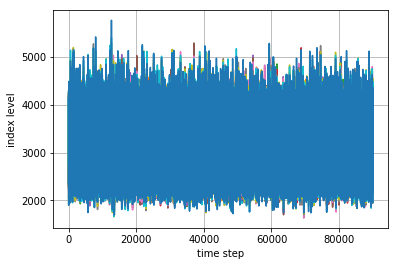

In [48]:
#-----visualization-----------------------
print('----------tendency------------')
plt.plot(S)
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index level')

Impirical Analysis on dynamic hedging

In [62]:
######package input########
from WindPy import *
w.start()

import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.stats.distributions import norm

In [7]:
######WindAlgo frame input#####
#from WindAlgo import *
#what the fuck?

In [63]:
#####paragemeters input  basic########
contractname = 'RB.SHF'
startdate = '2016-11-18'
enddate = '2018-12-17'
wsd_data = w.wsd(contractname, "close", startdate, enddate, "")
df = pd.DataFrame(wsd_data.Data,index=wsd_data.Fields,columns=wsd_data.Times)
df = df.T
df.head()
list_price = df['CLOSE'].tolist()
array_price = np.array(wsd_data.Data)
dates = wsd_data.Times
wss_data = w.wss(contractname, "punit,changelt,mfprice,contractmultiplier")
df_1 = pd.DataFrame(wss_data.Data,index=wss_data.Fields,columns=wss_data.Times).transpose()

In [64]:
#---------c or p flag-----

callputflag = 'c'
if callputflag == 'c':
    phi = 1
elif callputflag == 'p':
    phi = -1
        
#-------up or down flag--
updownflag = 'u'
if updownflag == 'u':
    eth = 1
elif updownflag =='d':
    eth = -1
#-------in or out flag---
inout = 'out'

In [65]:
#########################################################################
#--------parameters for option pricing and greeks calculation-----------#
#########################################################################

S = 4000             #initial price of underlying asset
multiple = 1
X = S * multiple
K = X
#for i in arange(len(date)-1:
#
#in matlab for i = 1:length(date)
#    t(i) = (date(end)-date(i))365
#end
r = 0.065
b = 0

#---------for barrier 
H =    4000 #barrier price

n = len(wsd_data.Times)
m = n
T = n/365
dt = T/m
#####historical volatility

logret = np.log(df)/np.log(df).shift(1).dropna()
v = np.std(logret)
sigma = v + 0.02

mu = (b-sigma**2/2)/(sigma**2)
lamda = np.sqrt(mu**2+2*r/(sigma**2))

In [66]:
#######specific details of contracct
ZSS = 30    #####总手数
CommissionPer = 0.000045*2     #####手续费比率
MarginPer= 0.15    #######保证金比率



In [84]:
####pricing function for barrier option

def price_option_barrier_2(S,T):
    
    
    d1 = (-np.log(S/H)-(r-b+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 + sigma*np.sqrt(T)
    d3 = (np.log(S/H)-(r-b-sigma**2/2)*T/(sigma*np.sqrt(T)))
    d4 = d3 + sigma*np.sqrt(T)
    d5 = (np.log(X/S)-(r-b+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d6 = d5 + sigma*np.sqrt(T)
    d7 = np.log(S*X/H**2)-(r-b-sigma**2/2)*T/sigma*np.sqrt(T)
    d8 = d7+sigma*np.sqrt(T)

          
          
    if callputflag == 'c':
        if inout == 'in':
            if S < H:
                price = S*np.exp(-b*T)*(norm.cdf(-d1,0,1)-(S/H)**(-2/sigma**2*(r-b)-1)*(norm.cdf(d3,0,1)-norm.cdf(d7,0,1)))-X*np.exp(-r*T)(norm.cdf(-d2,0,1)-(S/H)**(-2/sigma**2*(r-q)+1)*(norm.cdf(d4,0,1)-norm.cdf(d8,0,1)))
                  #####向上敲入看涨期权
            else:
                price = S*np.exp(-b*T)*(S/H)**(-2/sigma**2*(r-b)-1)*norm.cdf(-d7,0,1)-K*np.exp(-r*T)*(S/H)**(-2/sigma**2*(r-b)+1)*norm.cdf(-d8,0,1)
                  #####向下敲入看涨期权
        else:
            if S < H:
                price = S*np.exp(-b*T)*(norm.cdf(d1,0,1)-norm.cdf(d5,0,1)-(S/H)**(-2/sigma**2*(r-b)-1)*(norm.cdf(d3,0,1)-norm.cdf(d7,0,1)))-X*np.exp(-r*T)*(norm.cdf(d2,0,1)-norm.cdf(d6,0,1)-(S/H)**(-2/sigma**2*(r-b)+1)*(norm.cdf(d4,0,1)-norm.cdf(d8,0,1)))
                  #####向上敲出看涨期权
            else:
                price = S*np.exp(-b*T)*(norm.cdf(-d5,0,1)-(S/H)**(-2/sigma**2*(r-b)-1)*norm.cdf(-d7,0,1))-K*np.exp(-r*T)*(-(S/H)**(-2/sigma**2*(r-b)+1)*norm.cdf(-d8,0,1)+norm.cdf(-d6,0,1))
                #####向下敲出看涨期权
    else:
        if inout == 'in':
            if S < H :
                price = H*np.exp(-r*T)*(S/H)**(-2/sigma**2*(r-b)-1)*norm.cdf(d8,0,1)-S*np.exp(-b*T)*(S/H)**(-2/sigma**2*(r-b)-1)*norm.cdf(d7,0,1)
                ####向上敲入看跌期权
            else:
                X*np.exp(-r*T)*(norm.cdf(d2,0,1)-(S/H)**(-2/sigma**2*(r-b)+1)*(norm.cdf(d4,0,1)-norm.cdf(d8,0,1)))-S*np.exp(-b*T)(norm.cdf(d1,0,1)-(S/H)**(-2/sigma**2*(r-b)-1)*(norm.cdf(d3,0,1)-norm.cdf(d7,0,1)))
                ######向下敲入看跌期权
        else:
            if S < H :
                X*np.exp(-r*T)*(norm.cdf(d6,0,1)-(S/H)**(-2/sigma**2*(r-b)+1)*norm.cdf(d8,0,1))-S*np.exp(-q*T)*(norm.cdf(d5,0,1)-(S/H)**(-2/sigma**2*(r-b)-1)*norm.cdf(d7,0,1))
                ####向上敲出看跌期权
            else:
                price = X*np.exp(-r*T)*(norm.cdf(d6,0,1)-norm.cdf(d2,0,1)-(S/H)**(-2/sigma**2*(r-q)+1)*(norm.cdf(d8,0,1)-norm.cdf(d4,0,1)))-S*np.exp(-q*T)*(norm.cdf(d5,0,1)-norm.cdf(d1,0,1)-(S/H)**(-2/sigma**2*(r-q)-1)*(norm.cdf(d7,0,1)-norm.cdf(d3,0,1)))
                ####向下敲出看跌期权
    
    return price

In [85]:
def price_option_barrier_1(S,T):
    if S>H:
        eta = 1
    else:
        eta = -1
    
    
    
    sigma2 = sigma**2
    mu  = (b-(sigma2/2))/sigma2
    landa = math.sqrt(mu**2+(2*r)/sigma2)
    x1 = (math.log(S/X)) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    x2 = (math.log(S/H)) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    y1 = math.log((H**2)/(S*X)) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    y2 = math.log(H/S) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    z = math.log(H/S) / (sigma*math.sqrt(T)) + landa*sigma*math.sqrt(T)
    
    
    n1 = phi*x1 - phi*sigma*math.sqrt(T)
    A = phi * S*math.exp(b-r)*norm.cdf(phi*x1,0,1) - phi*X*math.exp(-r*T)*norm.cdf(n1,0,1)
    
    n2=phi*x2-phi*sigma*math.sqrt(T)
    B = phi *S*math.exp(b-r)*norm.cdf(phi*x2,0,1) - phi*X*math.exp(-r*T)*norm.cdf(n2,0,1)
    
    n3 = eta*y1
    n4 = eta*y1 - eta*sigma*math.sqrt(T)
    
    C = phi * S*math.exp(b-r)*(H/S)**(2*(mu+1))*norm.cdf(n3,0,1) - phi*X*math.exp(-r*T)*(H/S)
    
    n5 = eta*y2
    n6 = eta*y2 - eta*sigma*math.sqrt(T)
    D = phi * S*math.exp(b-r)*(H/S)**(2*(mu+1))*norm.cdf(n5,0,1) - phi*X*math.exp(-r*T)*(H/S)
    
    
    n9 = norm.cdf(eta*x2 - eta*sigma*math.sqrt(T),0,1)
    n10 = norm.cdf(eta*y2 - eta*sigma*math.sqrt(T),0,1)
    E = K*math.exp(-r*T)*(n9 - (H/S)**(2*mu)*n10)
    
    n11 = norm.cdf(z*eta,0,1)
    n12 = norm.cdf(eta*z - 2*eta*landa*sigma*math.sqrt(T),0,1)
    F = K*math.exp(-r*T)*((H/S)**(mu+landa)*(n11)-(H/S)**(mu-landa)*n12)

    
    
    if putcall == 'p':
        if X < H:
            if S > H:
                if inout =='in':
                    price = A + E
                elif inout == 'out':
                    price = F
            else:
                if inout == 'in':
                    price = C + E
                elif inout == 'out':
                    price = A - C + F
        
        else:
            if S > H:
                if inout == 'in':
                    price = B - C + D + E
                elif inout == 'out':
                    price = A - B + C - D + F
            else:
                if inout == 'in':
                    price = A - B + D + E
                elif inout == 'out':
                    price = B - D + F
    else:
        if X < H:
            if S > H:
                if inout == 'in':
                    price = A - B + D + E
                elif inout == 'out':
                    price = B - D + F
            else:
                if inout == 'in':
                    price = B - C + E + D
                elif inout == 'out':
                    price = A - B + C - D + F
        else:
            if S > H:
                if inout == 'in':
                    price = C + E
                elif inout == 'out':
                    price = A - C + F
            else:
                if inout == 'in':
                    price = A + E
                elif inout == 'out':
                    price = F
    if price < 0:
        price = 0
    
    return price

In [153]:
#######################loop############################
value_option = []
remain_t = []
days = len(wsd_data.Times)
for num in list_price:
    T=days/365
    value_option.append(price_option_barrier_2(num,T))
    days = days - 1

In [146]:
df['option_value'] = pd.DataFrame(value_option,index=df.index)

In [167]:
a = 0
value_delta = []
for i in range(len(wsd_data.Times)):
    if i > 0 and i < 508:
        delta_option_value = value_option[i+1]-value_option[i]
        delta_ua_value = list_price[i+1]-list_price[i]
        delta = delta_option_value/delta_ua_value
        value_delta.append(delta)
    elif i == 0:
        delta_option_value = value_option[i+1]-value_option[i]
        delta_ua_value = list_price[1]-list_price[0]
        delta = delta_option_value/delta_ua_value
        value_delta.append(delta)
    else:
        b=0
        value_delta.append(b)
print(len(value_delta))


509


In [174]:
df['delta'] = pd.DataFrame(value_delta,index=df.index)

TypeError: object of type 'int' has no len()

In [175]:
value_delta

[CLOSE    2.665013e+40
 dtype: float64, CLOSE    8.347984e+39
 dtype: float64, CLOSE    1.323818e+33
 dtype: float64, CLOSE    6.868108e+31
 dtype: float64, CLOSE    4.253931e+30
 dtype: float64, CLOSE    1.982759e+23
 dtype: float64, CLOSE    2.639132e+26
 dtype: float64, CLOSE    2.169708e+29
 dtype: float64, CLOSE    7.231789e+28
 dtype: float64, CLOSE    6.026982e+24
 dtype: float64, CLOSE    4.737740e+24
 dtype: float64, CLOSE    3.322678e+22
 dtype: float64, CLOSE    1.459341e+21
 dtype: float64, CLOSE    3.064348e+16
 dtype: float64, CLOSE    2.164876e+17
 dtype: float64, CLOSE    1.096232e+17
 dtype: float64, CLOSE    9.453727e+13
 dtype: float64, CLOSE    8.647668e+15
 dtype: float64, CLOSE    2.792960e+16
 dtype: float64, CLOSE    5.467435e+18
 dtype: float64, CLOSE    8.928756e+22
 dtype: float64, CLOSE    1.331502e+24
 dtype: float64, CLOSE    1.391723e+24
 dtype: float64, CLOSE    1.278040e+28
 dtype: float64, CLOSE    1.529029e+30
 dtype: float64, CLOSE    2.296572e+32
 d

In [170]:
df

,CLOSE,option_value,delta
2016-11-18,2772.0,-7.017719e+39,0
2016-11-21,2714.0,-1.552725e+42,CLOSE 8.347984e+39 dtype: float64
2016-11-22,2900.0,-7.214370e+34,CLOSE 1.323818e+33 dtype: float64
2016-11-23,2954.0,-6.575048e+32,CLOSE 6.868108e+31 dtype: float64
2016-11-24,2951.0,-8.635481e+32,CLOSE 4.253931e+30 dtype: float64
2016-11-25,3154.0,-3.529314e+25,CLOSE 1.982759e+23 dtype: float64
2016-11-28,3332.0,-2.647397e+19,CLOSE 2.639132e+26 dtype: float64
2016-11-29,3062.0,-7.125656e+28,CLOSE 2.169708e+29 dtype: float64
2016-11-30,3000.0,-1.352345e+31,CLOSE 7.231789e+28 dtype: float64
2016-12-01,3187.0,-2.570538e+24,CLOSE 6.026982e+24 dtype: float64


In [1]:
import numpy as np
import math
from time import time

In [2]:
np.random.seed(20000) 
t0=time()
 
s0=3433
K=3433
T=0.25
r=0.035
sigma=0.3
m=50
dt=T/m
I=250
 
S=np.zeros((m+1,I))  
S[0]=s0
for t in range(1,m+1):
    z=np.random.standard_normal(I)
    S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+ sigma *math.sqrt(dt)*z)
 
c=np.exp(-r*T)*np.sum( np.maximum(S[-1]-K,0))/I
 
tnp1=time()-t0
 
print(c,tnp1)

196.87166479703782 0.01700115203857422


In [ ]:
#————————AssetPathLimit——————————
#——————————————————————————

def apl(s0,sigma,T,steps,b,maxvol):
    a=[]
    for 
    a=a.append(s)
    

In [12]:
import math
import numpy as np
from random import seed,gauss
from math import exp, sqrt, log
import time
import matplotlib.pyplot as plt

#-------------------parameters----------
t = 120     #remaining time in days
T = t/360
r = 0.065    #risk free rate
S0 = 3433
K = 3433
m = 10   # m tracks
n = 30           #nodes，intervals

dt = T/n
I = 30
sigma=0.3
S = []
np.random.seed()




for i in range(I):
    path=[]
    for t in range(n+1):
        if t == 0:
            path.append(S0)
        else:
            w=gauss(0.0,1.0)
            St=path[t-1]*exp((r-0.5*sigma**2)*dt+sigma*sqrt(dt)*w)
            path.append(St)
        S.append(path)

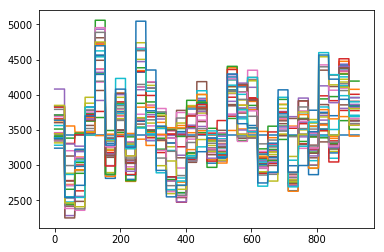

In [23]:

#-------packages------------
import numpy as np
from scipy.stats.distributions import norm

#----parameters------

S0 = 2800  ##### initial price of underlying asset
K = 2800   ######   strike price
v = 0.16       ######   volatility
t = 365      ###remaining time in days
T = t/365     ###time
mu = 0
r = 0.035

#---- structure transfer of data

S0 = float(S0)
K = float(K)
sigma = float(v)
T= float(T)

#----function define

def BS_option_price(S0,k,sigma,T):
	d1 = (np.log(S0/K)+(r+sigma**2/2)*T)/sigma*np.sqrt(T)
	d2 = d1 - sigma*np.sqrt(T)
	c = S0*norm.cdf(d1,0,1)-K*np.exp(-r*T)*norm.cdf(d2,0,1)
	p = K*np.exp(-r*T)*norm.cdf(-d2,0,1)-S0*norm.cdf(-d1,0,1)
	return c,p 

c,p = BS_option_price(S0,K,sigma,T)
print(c)
print(p)

227.78981002150977
131.48497554269557


50etf     Option return Calculation 

Based on Historical Data

In [4]:
from WindPy import *
import pandas as pd
import numpy as np
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [12]:
import matplotlib.pyplot as plt

In [107]:
import datetime as dt

In [127]:
from pandas import DataFrame

In [64]:
startdate = '2015-01-15'
enddate = '2019-01-15'
wsddata_50etf = w.wsd("510050.SH", "close,us_impliedvol,us_hisvol,exe_price,exe_type,exe_mode", startdate, enddate, "")

wsddata_50etfoption = w.wsd("10000007.SH", "close,oi,us_impliedvol,underlyinghisvol_30d,us_hisvol,exe_price,exe_type,exe_mode,exe_enddate", "2015-01-15", "2019-01-16", "")

In [65]:
#data in dataframe
df_1 = pd.DataFrame(wsddata_50etf.Data,index=wsddata_50etf.Fields,columns=wsddata_50etf.Times).transpose()
df_2 = pd.DataFrame(wsddata_50etfoption.Data,index=wsddata_50etfoption.Fields,columns=wsddata_50etfoption.Times).transpose().dropna()

In [46]:
df_1 = df_1[['CLOSE']]

In [66]:
df_2.head()

,CLOSE,OI,US_IMPLIEDVOL,UNDERLYINGHISVOL_30D,US_HISVOL,EXE_PRICE,EXE_TYPE,EXE_MODE,EXE_ENDDATE
2015-02-09,0.0777,319,0.369692,44.618,45.9627,2.25,欧式,认沽,2015-03-25 00:00:00
2015-02-10,0.0578,399,0.348382,42.8982,46.0101,2.25,欧式,认沽,2015-03-25 00:00:00
2015-02-11,0.0425,690,0.307666,42.915,45.185,2.25,欧式,认沽,2015-03-25 00:00:00
2015-02-12,0.032,741,0.27398,42.7157,45.0002,2.25,欧式,认沽,2015-03-25 00:00:00
2015-02-13,0.0236,679,0.247105,42.0891,44.947,2.25,欧式,认沽,2015-03-25 00:00:00


In [76]:
print(df_2.head())
print(df_2.shape)

             CLOSE     OI  US_IMPLIEDVOL  UNDERLYINGHISVOL_30D  US_HISVOL
2015-02-09  0.0777  319.0       0.369692             44.617959  45.962726
2015-02-10  0.0578  399.0       0.348382             42.898206  46.010069
2015-02-11  0.0425  690.0       0.307666             42.915024  45.184984
2015-02-12  0.0320  741.0       0.273980             42.715736  45.000151
2015-02-13  0.0236  679.0       0.247105             42.089130  44.947042
(27, 5)


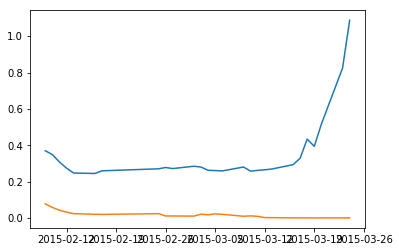

In [71]:
plt.plot(df_2['US_IMPLIEDVOL'])
plt.plot(df_2['CLOSE'])

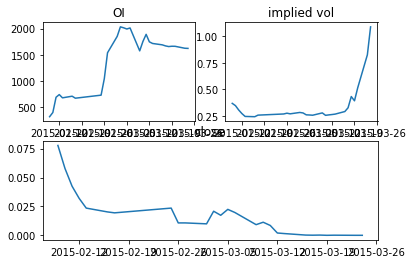

In [74]:
#第一行第一列图形
ax1 = plt.subplot(2,2,1)
#第一行第二列图形
ax2 = plt.subplot(2,2,2)
#第二行
ax3 = plt.subplot(2,1,2)
#选择ax1
plt.sca(ax1)
#绘制红色曲线
plt.plot(df_2['OI'])
plt.title('OI')
#限制y坐标轴范围
#plt.ylim(-1.2,1.2)
#选择ax2
plt.sca(ax2)
#绘制蓝色曲线
plt.plot(df_2['US_IMPLIEDVOL'])
plt.title('implied vol')
#plt.ylim(-1.2,1.2)
plt.sca(ax3)
plt.plot(df_2['CLOSE'])
plt.title('close')
plt.show()

In [75]:
df_1.head()

,CLOSE,US_IMPLIEDVOL,US_HISVOL
2015-01-15,2.586,NaN,NaN
2015-01-16,2.604,NaN,NaN
2015-01-19,2.344,NaN,NaN
2015-01-20,2.361,NaN,NaN
2015-01-21,2.503,NaN,NaN


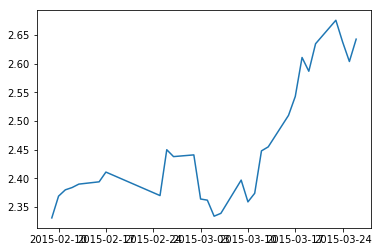

In [114]:
df_2.head()
plt.plot(df_1.truncate(after=dt.date(2015,3,26),before=dt.date(2015,2,9)))

In [149]:
df_1_1=DataFrame(df_1[dt.date(2015,2,9):dt.date(2015,3,26)][['CLOSE']])
max_closeprice = df_1_1.sort_values(['CLOSE'],ascending=False).iloc[0,0]
print(max_closeprice)
ex_closeprice=DataFrame(df_1[dt.date(2015,3,26):dt.date(2015,3,26)][['CLOSE']]).iloc[0,0]
print(ex_closeprice)

2.676
2.643


In [153]:
df_2_1=DataFrame(df_2[dt.date(2015,2,9):dt.date(2015,3,26)][['CLOSE']])
cost_option=DataFrame(df_2[dt.date(2015,2,9):dt.date(2015,2,9)][['CLOSE']]).iloc[0,0]
cost_option

0.0777

In [8]:
#-*-coding:utf-8 -*-
#packages loaded

from WindPy import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
p = print
from pandas import DataFrame
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [374]:
#---data collection---------

#----modify the name of contract-----
contractname = '10001556.SH'
p('-------code of option--------')
p(contractname)
#----start date or the option-bought date---
startdate = '2018-12-03'
p('--------start date-------')
p(startdate)
start_datetime = dt.datetime.strptime(startdate,'%Y-%m-%d')
p(type(start_datetime))
enddate = '2019-01-15'
end_datetime = dt.datetime.strptime(enddate,'%Y-%m-%d')
wsd_50etf = w.wsd("510050.SH", "close,us_impliedvol,us_hisvol", startdate, enddate, "")
wsd_option = w.wsd(contractname, "close,oi,us_impliedvol,underlyinghisvol_30d,us_hisvol,exe_price,exe_type,exe_mode,exe_enddate", startdate, enddate, "")
#data in dataframe
df_50etf = pd.DataFrame(wsd_50etf.Data,index=wsd_50etf.Fields,columns=wsd_50etf.Times).transpose()
df_option = pd.DataFrame(wsd_option.Data,index=wsd_option.Fields,columns=wsd_option.Times).transpose()

-------code of option--------
10001556.SH
--------start date-------
2018-12-03
<class 'datetime.datetime'>


In [375]:
#-----relevant info about option
cost_option=DataFrame(df_option[start_datetime.date():start_datetime.date()][['CLOSE']]).iloc[0,0]
p('cost of option ', cost_option)
ex_price=DataFrame(df_option[start_datetime.date():start_datetime.date()])[['EXE_PRICE']].iloc[0,0]
p('execise price of option', ex_price)
putcall=DataFrame(df_option[start_datetime.date():start_datetime.date()])[['EXE_MODE']].iloc[0,0]
p('看涨或看跌   ', putcall)
AE=DataFrame(df_option[start_datetime.date():start_datetime.date()])[['EXE_TYPE']].iloc[0,0]
p('行权类型    ',AE)
exe_timestamp=DataFrame(df_option[['EXE_ENDDATE']]).iloc[0,0]
p('到期日     ',exe_timestamp)

cost of option  0.0413
execise price of option 2.45
看涨或看跌    认沽
行权类型     欧式
到期日      2018-12-26 00:00:00


In [118]:
putcallflag = ''

In [11]:
def option_pic_analysis(df_option):
    #第一行第一列图形
    ax1 = plt.subplot(2,2,1)
    #第一行第二列图形
    ax2 = plt.subplot(2,2,2)
    #第二行
    ax3 = plt.subplot(2,1,2)
    #选择ax1
    plt.sca(ax1)
    #绘制红色曲线
    plt.plot(df_option['OI'])
    plt.title('OI')
    #限制y坐标轴范围
    #plt.ylim(-1.2,1.2)
    #选择ax2
    plt.sca(ax2)
    #绘制蓝色曲线
    plt.plot(df_option['US_IMPLIEDVOL'])
    plt.title('implied vol')
    #plt.ylim(-1.2,1.2)
    plt.sca(ax3)
    plt.plot(df_option['CLOSE'])
    plt.title('close')
    plt.show()

In [121]:
#considering the option on 50etf is strandard european, so enddate is exactly executive date
#-*-coding:utf-8 -*-
def return_rate(contractname,startdate):
    #AEflag
    #enddate & exercise date
    if AE == '欧式':
        AEflag = 'European'
        end_date = exe_timestamp.date()
        exe_date = end_date
    elif AE == '美式':
        AEflag = 'American'
        exe_date = max_date
    
    
    
    

    #data manipulation
    df_1=DataFrame(df_50etf[start_datetime.date():end_datetime.date()][['CLOSE']])
    array_ua_close = np.array(df_1)
    
    
    
    
    
    #putcallflag
    if putcall == '认沽':
        putcallflag = 'p'
    else:
        putcallflag = 'c'



        
        
    #executive price
    max_closeprice = df_1.sort_values(['CLOSE'],ascending=False).iloc[0,0]
    max_date = df_1[df_1['CLOSE']==max_closeprice].index
    last_closeprice=DataFrame(df_1[end_date:end_date][['CLOSE']]).iloc[0,0]
    ini_closeprice=DataFrame(df_1[start_datetime.date():start_datetime.date()][['CLOSE']]).iloc[0,0]
    
        #return rate
    if AEflag == 'European':
        if last_closeprice > ex_price:
            if putcallflag=='c':
                ret=last_closeprice-ex_price-cost_option
            elif putcallflag == 'p':
                ret=-1*cost_option
        elif last_closeprice < ex_price:
            if putcallflag=='c':
                ret=-1*cost_option
            elif putcallflag=='p':
                ret=ex_price-last_closeprice-cost_option
        elif last_closeprice == ex_price:
                ret=-1*ex_price
    elif AEflag == 'American':
        print('American Option is unavaliable for now')
    
    ret_rate = ret/cost_option
    
    return ret_rate  

In [376]:
p('----------------------------------')
p('---return rate of option----------')
p(return_rate(contractname,start_datetime))
p('----------------------------------')
p('----------------------------------')

----------------------------------
---return rate of option----------
3.2372881355932264
----------------------------------
----------------------------------


In [ ]:
contractname = '10000417.SH'